
Created on Tue Aug 18 14:32:57 2015

@author: chaimdemulder

@copyright: (c) 2015, Chaïm De Mulder

@functions (see docstrings in AllFunctions.py for more info)
* delete_doubles
* calc_slopes
* drop_peaks
* simple_moving_average
* moving_average_filter
* moving_slope_filter
* _select_slope
* extract_slopes
* _get_header_length
* _open_file
* _read_file
* join_dir_files
* get_avg
* get_std
* plt_avg_and_std
* _make_month_day_array
* _get_absolute_time
* add_absolute_time

In [1]:
import sys
import os
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt   #plotten in python

from os import listdir
from datetime import timedelta

%matplotlib inline

In [2]:
%run AllFunctions

DataAnalysisFcns.py loaded
DataReadingFcns.py loaded
TimeConversionFcns.py loaded


## SCRIPT

#### Read data

File  RB-2016-02-24-17-21-01.csv  has 0 header lines, adding data to dataframe with columns Index([u'TheTime', u'B_DO', u'B_K', u'B_LevelControl_in',
       u'B_LevelControl_out', u'B_MFC', u'B_NH4', u'B_pH', u'B_Pump_acid',
       u'B_Pump_base', u'B_Pump_effluent', u'B_Pump_effluent_speed',
       u'B_Pump_influent', u'B_Pump_influent_speed', u'B_Stirrer', u'B_T_DO',
       u'B_T_ISE', u'B_Valve_air', u'B_Valve_N2', u'B_slopeNH4'],
      dtype='object')
File  RB-2016-02-24-18-40-19.csv  has 0 header lines, adding data to dataframe with columns Index([u'TheTime', u'B_DO', u'B_K', u'B_LevelControl_in',
       u'B_LevelControl_out', u'B_MFC', u'B_NH4', u'B_pH', u'B_Pump_acid',
       u'B_Pump_base', u'B_Pump_effluent', u'B_Pump_effluent_speed',
       u'B_Pump_influent', u'B_Pump_influent_speed', u'B_Stirrer', u'B_T_DO',
       u'B_T_ISE', u'B_Valve_air', u'B_Valve_N2', u'B_slopeNH4'],
      dtype='object')
File  RB-2016-02-24-20-00-03.csv  has 0 header lines, adding data to dataframe w

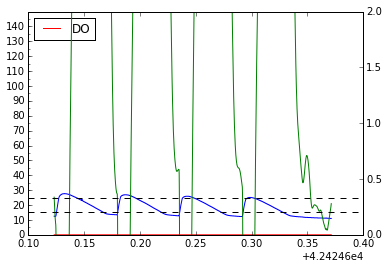

In [12]:
data = join_dir_files('C:/Users/dseuntje/OneDrive - UGent/Werk Ugent/Projects/2015_Oxygen_inhibition AMX/Results/Digital_data_reactors/20151112_Exp_2/Without Nitrite/20160224 0.7/extra analysis_1',
                      ext='csv',comment='#')
data.columns
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_zorder(ax2.get_zorder()+1) # put ax1 in front of ax2 
ax1.patch.set_visible(False) # hide the 'canvas' 

ax1.plot(data['TheTime'],data['B_NH4'],label='NH4')
ax1.plot(data['TheTime'],data['B_slopeNH4']*3600*24,label='Slope')
ax1.set_ylim(0,150)


ax1.axhline(25, color='k', linestyle='--')#to define upper limit of slope extraction
ax1.axhline(15, color='k', linestyle='--')#to define lower limit of slope extraction
major_ticks = np.arange(0,150,10)                                              
minor_ticks = np.arange(0,150,5)                                               

                                      
ax1.set_yticks(major_ticks)                                                       
ax1.set_yticks(minor_ticks, minor=True) 
 
plt.legend(loc=1)

ax2.plot(data['TheTime'],data['B_DO'],label='DO',color='r')
ax2.set_ylim(0,2)
plt.legend(loc=2)


In [13]:
#define the arguments of the extract_slopes function
path = 'C:/Users/dseuntje/OneDrive - UGent/Werk Ugent/Projects/2015_Oxygen_inhibition AMX/Results/Digital_data_reactors/20151112_Exp_2/Without Nitrite/20160224 0.7/extra analysis_1'
file_extension = 'csv'
time_column = 'TheTime'
data_column = 'B_NH4'
filter_function = moving_slope_filter
cutoff_value = 1000
comment = '#'
slope_direction_down = True
lower_data_limit = 15
upper_data_limit = 25
time_unit = 'd'
delta_t = timedelta(minutes=10)
schrikkeljaar = True
plot_parameters = [True,(-1000,-750,-500,-250,-200,-150,-100,-50,0)]

Reading 4 files...
Creating log-file at C:/Users/dseuntje/OneDrive - UGent/Werk Ugent/Projects/2015_Oxygen_inhibition AMX/Results/Digital_data_reactors/20151112_Exp_2/Without Nitrite/20160224 0.7/extra analysis_1\log.md


C:\Users\dseuntje\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


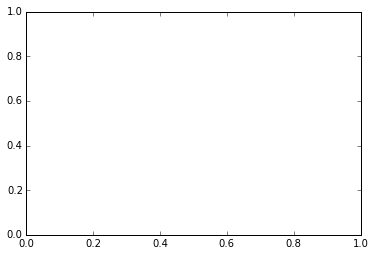

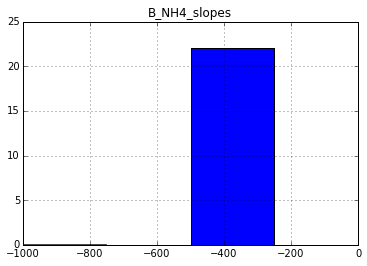

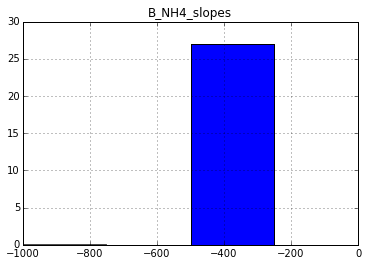

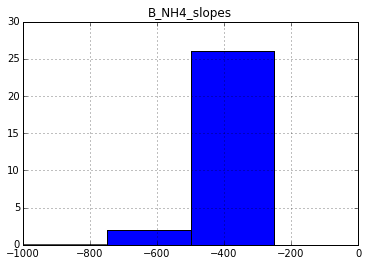

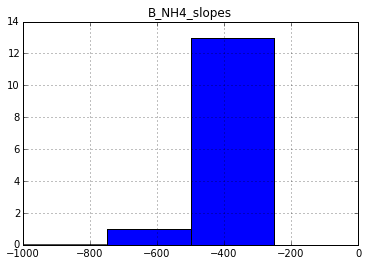

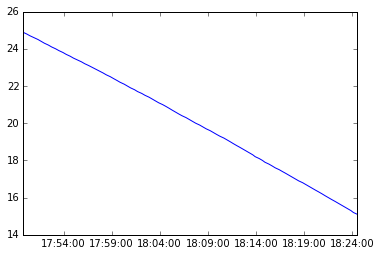

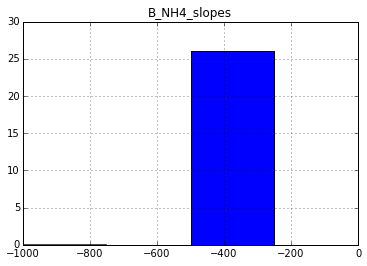

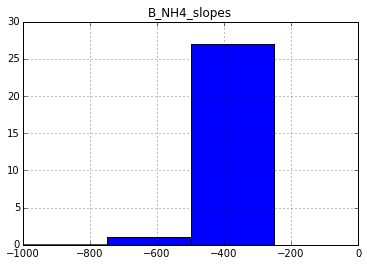

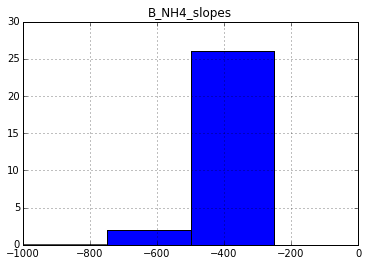

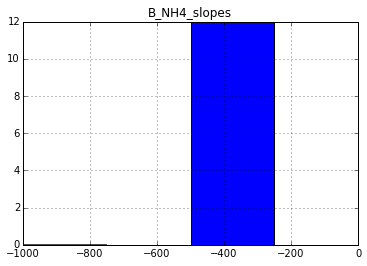

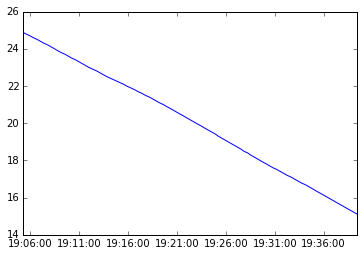

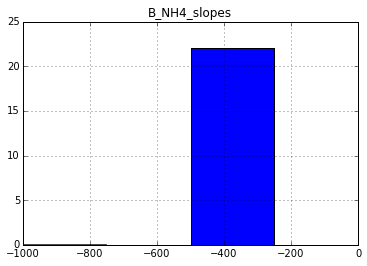

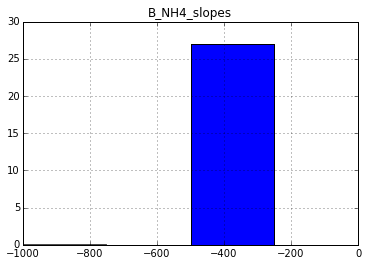

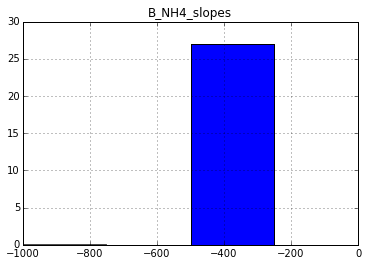

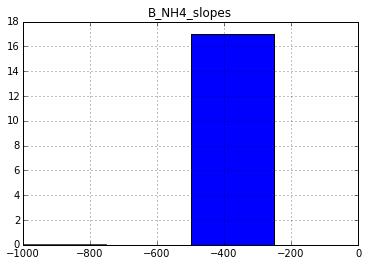

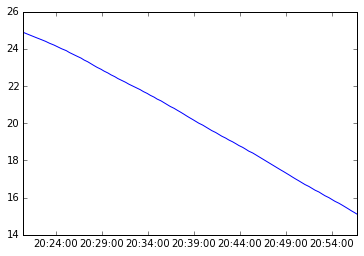

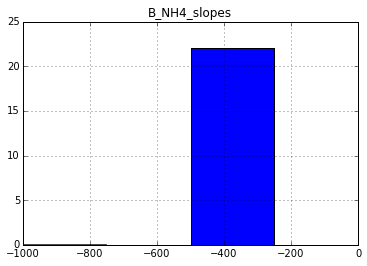

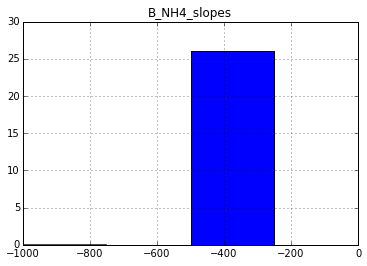

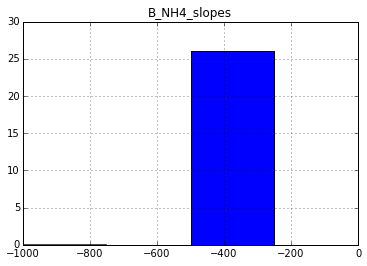

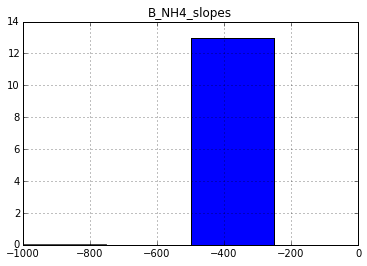

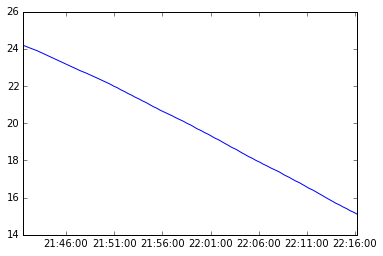

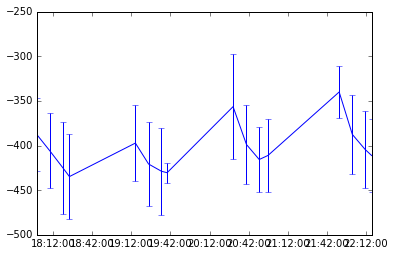

In [14]:
slopes,figure,axes = extract_slopes(path,time_column,data_column,filter_function,cutoff_value,file_extension,
                                    comment,slope_direction_down,[lower_data_limit,upper_data_limit],time_unit,
                                    delta_t,schrikkeljaar,plot_parameters)

In [45]:
slopes.to_csv('C:/Users/dseuntje/OneDrive - UGent/Werk Ugent/Projects/2015_Oxygen_inhibition AMX/Results/Digital_data_reactors/20151112_Exp_2/Total overview/Output Data/20151130_after.csv', sep='\t')